# Brownian Motion

Brownian motion describes the random, continuous movement of particles suspended in a fluid due to collisions with molecules of the fluid.

In quantitative finance, **Brownian motion is the foundation of modern stochastic calculus** and used to model the unpredictable evolution of asset prices.

---

## Definition

A standard Brownian motion \( B(t) \) is a continuous-time stochastic process with the following properties:

- \( B(0) = 0 \) almost surely.
- Independent increments: For \( 0 \leq s < t \), \( B(t) - B(s) \) is independent of the past.
- Normally distributed increments: \( B(t) - B(s) \sim \mathcal{N}(0, t-s) \).
- Continuous paths.

Expectation and variance:
$$
\mathbb{E}[B(t)] = 0, \quad \text{Var}(B(t)) = t
$$

---

## Applications

- Modeling log returns of asset prices.
- Basis for **Geometric Brownian Motion (GBM)** in Black-Scholes-Merton option pricing.
- Foundation for stochastic differential equations (SDEs) in finance.


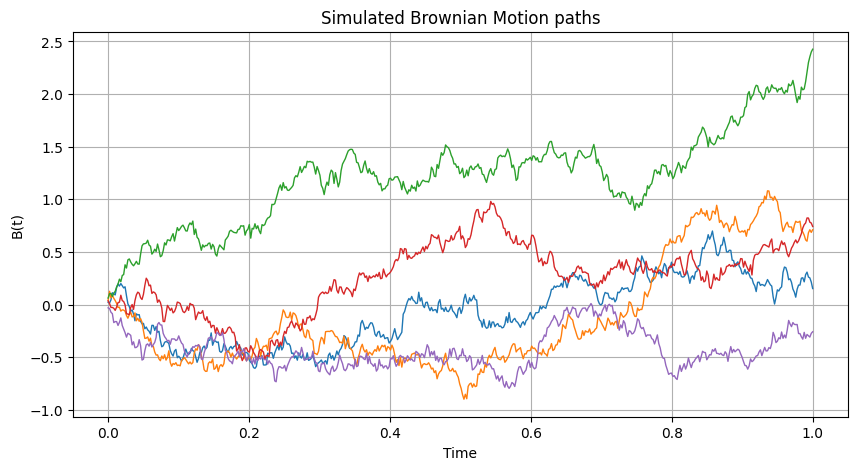

In [1]:
# Simulating and plotting Brownian motion paths

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

T = 1.0  # Total time (1 year)
N = 500  # Number of time steps
dt = T / N
t = np.linspace(0, T, N)

# Simulate 5 Brownian motion paths
num_paths = 5
paths = np.zeros((num_paths, N))

for i in range(num_paths):
    dB = np.sqrt(dt) * np.random.randn(N)
    B = np.cumsum(dB)
    paths[i] = B

plt.figure(figsize=(10, 5))
for i in range(num_paths):
    plt.plot(t, paths[i], lw=1)
plt.title("Simulated Brownian Motion paths")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.show()

## Brownian Motion with Drift and Volatility

A generalized Brownian motion process introduces drift \( \mu \) and volatility \( \sigma \):
$$
X(t) = \mu t + \sigma B(t)
$$

- $( \mu )$: deterministic drift term (average rate of change).
- $( \sigma )$: volatility scaling term (variance scale).

This is the **precursor to Geometric Brownian Motion** used in asset price modeling.


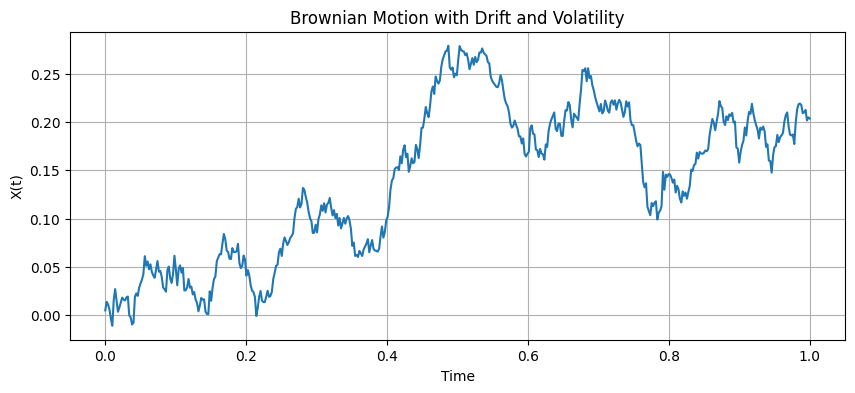

In [2]:
# Simulate Brownian motion with drift and volatility
mu = 0.1      # drift
sigma = 0.2   # volatility

B = np.cumsum(np.sqrt(dt) * np.random.randn(N))
X = mu * t + sigma * B

plt.figure(figsize=(10, 4))
plt.plot(t, X)
plt.title("Brownian Motion with Drift and Volatility")
plt.xlabel("Time")
plt.ylabel("X(t)")
plt.grid(True)
plt.show()


## Empirical Verification on Financial Data

An important question: Do asset returns resemble Brownian motion?

Tests:
- **Normality of increments** (Shapiro-Wilk test, skewness, kurtosis).
- **Independence of increments** (autocorrelation test).


/var/folders/ry/7h2qkbms38q458j803wlq8c80000gp/T/ipykernel_871/2831234570.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", period="5y")
[*********************100%***********************]  1 of 1 completed


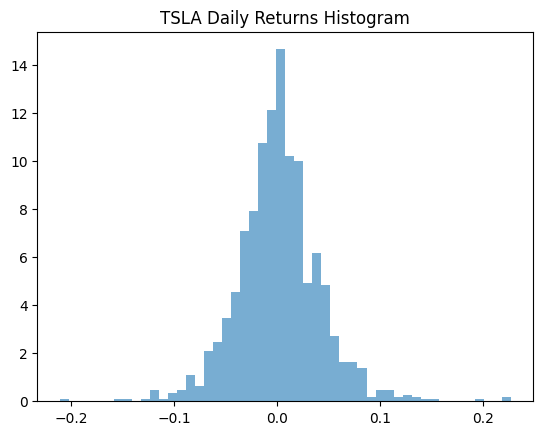

Shapiro-Wilk test statistic = 0.9690, p-value = 0.0000


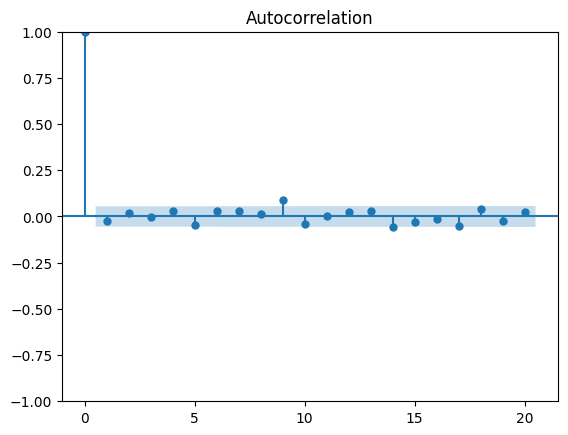

In [5]:
import yfinance as yf
from scipy.stats import shapiro
import statsmodels.api as sm

tsla = yf.download("TSLA", period="5y")
returns = tsla['Close'].pct_change().dropna()

# Histogram and normality test
plt.hist(returns, bins=50, density=True, alpha=0.6)
plt.title("TSLA Daily Returns Histogram")
plt.show()

stat, p = shapiro(returns)
print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")

# Autocorrelation plot
sm.graphics.tsa.plot_acf(returns, lags=20)
plt.show()


## Convergence Study of Simulated Variance

As $( N \to \infty )$, empirical variance of $( B(t) )$ at final time should approximate $( t )$.


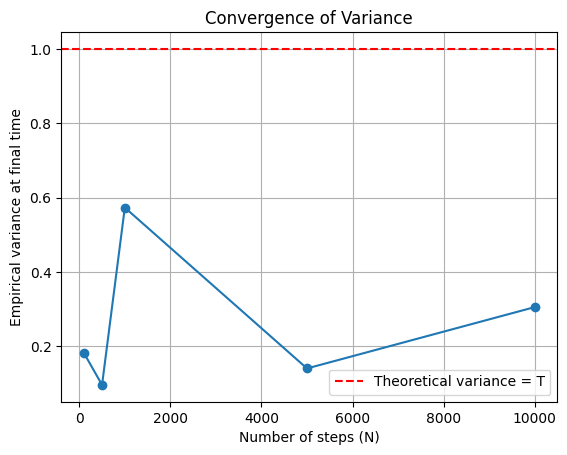

In [6]:
final_vars = []
N_list = [100, 500, 1000, 5000, 10000]

for N_sim in N_list:
    dt_sim = T / N_sim
    B_sim = np.cumsum(np.sqrt(dt_sim) * np.random.randn(N_sim))
    final_vars.append(np.var(B_sim))

plt.plot(N_list, final_vars, marker='o')
plt.axhline(y=T, color='r', linestyle='--', label='Theoretical variance = T')
plt.xlabel("Number of steps (N)")
plt.ylabel("Empirical variance at final time")
plt.title("Convergence of Variance")
plt.legend()
plt.grid(True)
plt.show()


## Brownian Bridge

A **Brownian bridge** is a Brownian motion conditioned to return to zero at final time \( T \):
$$
B_b(t) = B(t) - \frac{t}{T} B(T)
$$

It models paths constrained at endpoints.


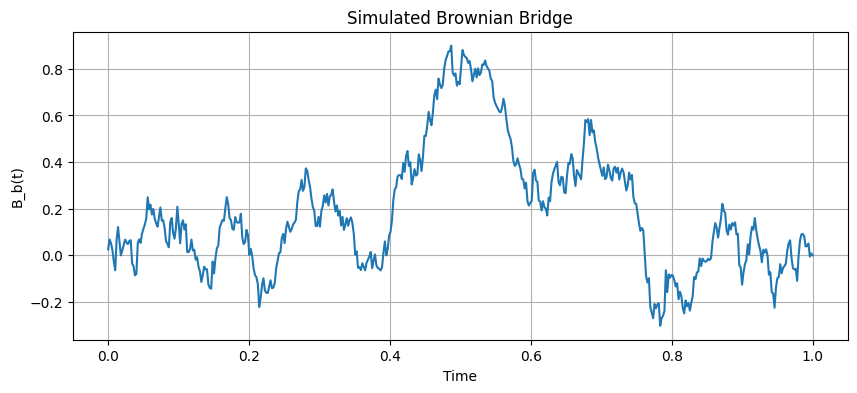

In [7]:
B_T = B[-1]
B_bridge = B - t * B_T

plt.figure(figsize=(10, 4))
plt.plot(t, B_bridge)
plt.title("Simulated Brownian Bridge")
plt.xlabel("Time")
plt.ylabel("B_b(t)")
plt.grid(True)
plt.show()


## Distribution of Extrema

An interesting property of Brownian motion is its **distribution of maxima, minima, and first hitting times**.

Example: Analyze the distribution of the max value reached by simulated paths.


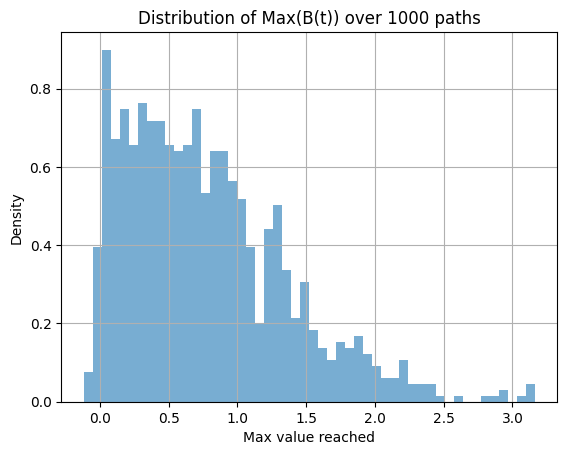

In [8]:
num_paths = 1000
maxima = []

for _ in range(num_paths):
    B_path = np.cumsum(np.sqrt(dt) * np.random.randn(N))
    maxima.append(np.max(B_path))

plt.hist(maxima, bins=50, density=True, alpha=0.6)
plt.title("Distribution of Max(B(t)) over 1000 paths")
plt.xlabel("Max value reached")
plt.ylabel("Density")
plt.grid(True)
plt.show()
